In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a biblioteca warnings para ignorar avisos durante a execução do código
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
df = pd.read_excel('Dados/Dados mais Brutos.xlsx')

In [34]:
df.head()

,Cidade,Estado,Data,População residente,Densidade demográfica,Densidade100,Índice de Gini,Gini100,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Taxa de Acesso à Internet,Baixo,Médio,Alto,Percentual de estrangeiros,PIB per capita 2014,PIBpc100,Número de Agências,BANHAB,BANHAB100,Depósitos à vista - governo,Depósitos à vista - privado,Depósitos a prazo,Total Depósitos,DEPHAB,DEPHAB100,Camas em hospitais por milhares de habitantes,SCAMH100,Centros de saúde por milhares de habitantes,SCSAU100,Óbitos até 1 ano de idade por milhares de habitantes,SOBIT100,Óbitos por milhares de habitantes,SMORH100,Nascidos por milhares de habitantes,SNASC100,Hospitais por milhares de habitantes,SHOSP100,Médicos por milhares de habitantes,SMEDH100,Escolas primárias por dez mil habitantes,ESCPRI100,Escolas secundárias por dez mil habitantes,ESCSEC100,Escolas de ensino superior por dez mil habitantes,ESCTER100,% de pobres,TXPOB100,IDHM Longevidade,IDH100,Percentual de trabalhadores especializados,TRESP100,Percentual de Empregados em Ciência & Tecnologia,EMPCT100,Percentual de Empregados em Setores de Alta Tecnologia,EMPAT100,Razão de Gênero,"Valores de Importação por 10,000 habitantes",IMPHAB100,"Valores de Exportação por 10,000 habitantes",EXPHAB100,"Número de hotéis por 1,0000 habitantes",HOTHAB100,Percentual de empresas do setor primário em realação ao total,EMPPRIM100,Percentual de empresas do setor secundário em relação ao total,EMPSEC100,Percentual de empresas do setor terciário em relação ao total,EMPTER100,Percentual de empresas do setor público em relação ao total,EMPUB100,Percentual de empresas do setor privado em relação ao total,EMPRIV100,Percentual de trabalhadores do setor primário em relação ao total,TRABPRI100,Percentual de trabalhadores do setor secundário em relação ao total,TRABSEC100,Percentual de trabalhadores do setor terciário em relação ao total,TRABTER100,Média Salarial,MEDSAL100,Variação Salarial,Produtividade,PRODUT100,Taxa de desemprego dos jovens,DESJOV100,Taxa de desemprego,DESEMP100,Percentual de população total com renda,Proporção de estudantes de escolas primárias,Proporção de estudantes de escolas secundárias,Proporção de estudantes de faculdades,Número de livrarias por mil habitantes,LIVHAB100,"Número de Lojas(Comerciais, hotéis e restaurantes) por 1,000 habitantes",EMPCOM100,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes",TRACOM100,"Unidades de Atendimento da Administração Local por 10,000 habitantes",ATDADM100,"Número de ativos culturais e de lazer por 10,000 habitantes",ATVCUL100,Turnover,TURN100,Mediana salarial,MEDIANA100,Renda média domiciliar,RENDA100
0,Abadia de Goiás,Goiás,2015,6876,46.85,0.359705,0.42,52.50,43.27,50.86,5.88,72.46,33.98,16.06,67.23,22.68,10.09,0.00,23938.19,2.936863,0,0.000000,0.000000,0,0,0,0,0.000000e+00,0.000000,0.0,0.000000,0.6,9.090909,0.3,13.043478,2.9,7.090465,15.4,21.300138,0.00,0.000000,0.00,0.000000,10.18,9.010444,1.45,9.113765,0.00,0.000000,6.18,7.863596,0.83,93.258427,13.23,13.626532,0.37,1.239116,0.0,0.0,0.96,0.0,0.0,0.00,0.000000,0.00,0.000000,3.96,3.96,39.60,58.389855,56.44,56.44,0.50,0.50,99.50,99.50,9.69,9.69,33.56,37.313765,47.37,48.047469,1740.74,18.668494,20.46,2073776.12,2.832279,12.03,19.592834,5.03,12.047904,98.28,81.907895,18.092105,0.000000,0.15,0.563486,9.02,24.208266,60.21,10.295123,2.91,11.376075,2.91,10.931630,96.25,8.696006,1025.20,12.009296,1817.90,29.550845
1,Abadia dos Dourados,Minas Gerais,2015,6704,7.61,0.058428,0.47,58.75,34.99,55.83,9.17,63.80,56.24,10.98,79.31,13.50,7.19,0.00,27399.24,3.361483,1,0.149165,12.007757,46144,2765868,1432200,4244212,6.330865e+06,1.164808,3.1,3.444444,0.9,13.636364,0.3,13.043478,5.1,12.469438,9.6,13.278008,0.29,38.157895,0.15,1.530612,8.95,7.921756,1.49,9.365179,0.00,0.000000,7.94,10.103067,0.84,94.382022,8.75,9.012257,0.90,3.014066,0.0,0.0,1.03,0.0,0.0,0.00,0.000000,1.49,0.483798,3.85,3.85,19.93,29.386612,76.22,76.22,0.70,0.70,99

In [35]:
df.shape

(5565, 111)

In [36]:
# Obtendo informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Columns: 111 entries, Cidade to RENDA100
dtypes: float64(102), int64(7), object(2)
memory usage: 4.7+ MB


In [37]:
# Verificar dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

Dados ausentes por coluna:
Cidade                                                                             0
Estado                                                                             0
Data                                                                               0
População residente                                                                0
Densidade demográfica                                                              0
Densidade100                                                                       0
Índice de Gini                                                                     0
Gini100                                                                            0
Porcentagem de Jovens                                                              0
Porcentagem de Ativos                                                              0
Porcentagem de Idosos                                                              0
Taxa de Urbanização                   

In [38]:
print(df['Produtividade'].describe())

count    5.565000e+03
mean     2.766694e+06
std      3.120586e+06
min      6.289035e+05
25%      1.415220e+06
50%      2.053920e+06
75%      3.130039e+06
max      7.321935e+07
Name: Produtividade, dtype: float64


In [39]:
correlation_matrix = df.corr()
correlation_prod = correlation_matrix['Produtividade']

# Ordenando os valores em ordem decrescente para obter as variáveis mais correlacionadas primeiro
correlation_prod_sorted = correlation_prod.sort_values(ascending=False)

# Imprimindo as variáveis mais correlacionadas com 'Produtividade'
print(correlation_prod_sorted)


Produtividade                                                                      1.000000
PRODUT100                                                                          1.000000
PIBpc100                                                                           0.812080
PIB per capita 2014                                                                0.812080
Média Salarial                                                                     0.443393
MEDSAL100                                                                          0.443393
MEDIANA100                                                                         0.395713
Mediana salarial                                                                   0.395713
DEPHAB                                                                             0.394784
DEPHAB100                                                                          0.394784
Valores de Exportação por 10,000 habitantes                                     

In [40]:
correlation_matrix = df.corr()
correlation_prod_abs = correlation_matrix['Produtividade'].abs()

# Ordenando os valores em ordem decrescente para obter as variáveis mais correlacionadas primeiro
correlation_prod_sorted_abs = correlation_prod_abs.sort_values(ascending=False)

# Imprimindo as variáveis mais correlacionadas com 'Produtividade'
print(correlation_prod_sorted_abs)


Produtividade                                                                      1.000000
PRODUT100                                                                          1.000000
PIBpc100                                                                           0.812080
PIB per capita 2014                                                                0.812080
Média Salarial                                                                     0.443393
MEDSAL100                                                                          0.443393
MEDIANA100                                                                         0.395713
Mediana salarial                                                                   0.395713
DEPHAB                                                                             0.394784
DEPHAB100                                                                          0.394784
Valores de Exportação por 10,000 habitantes                                     

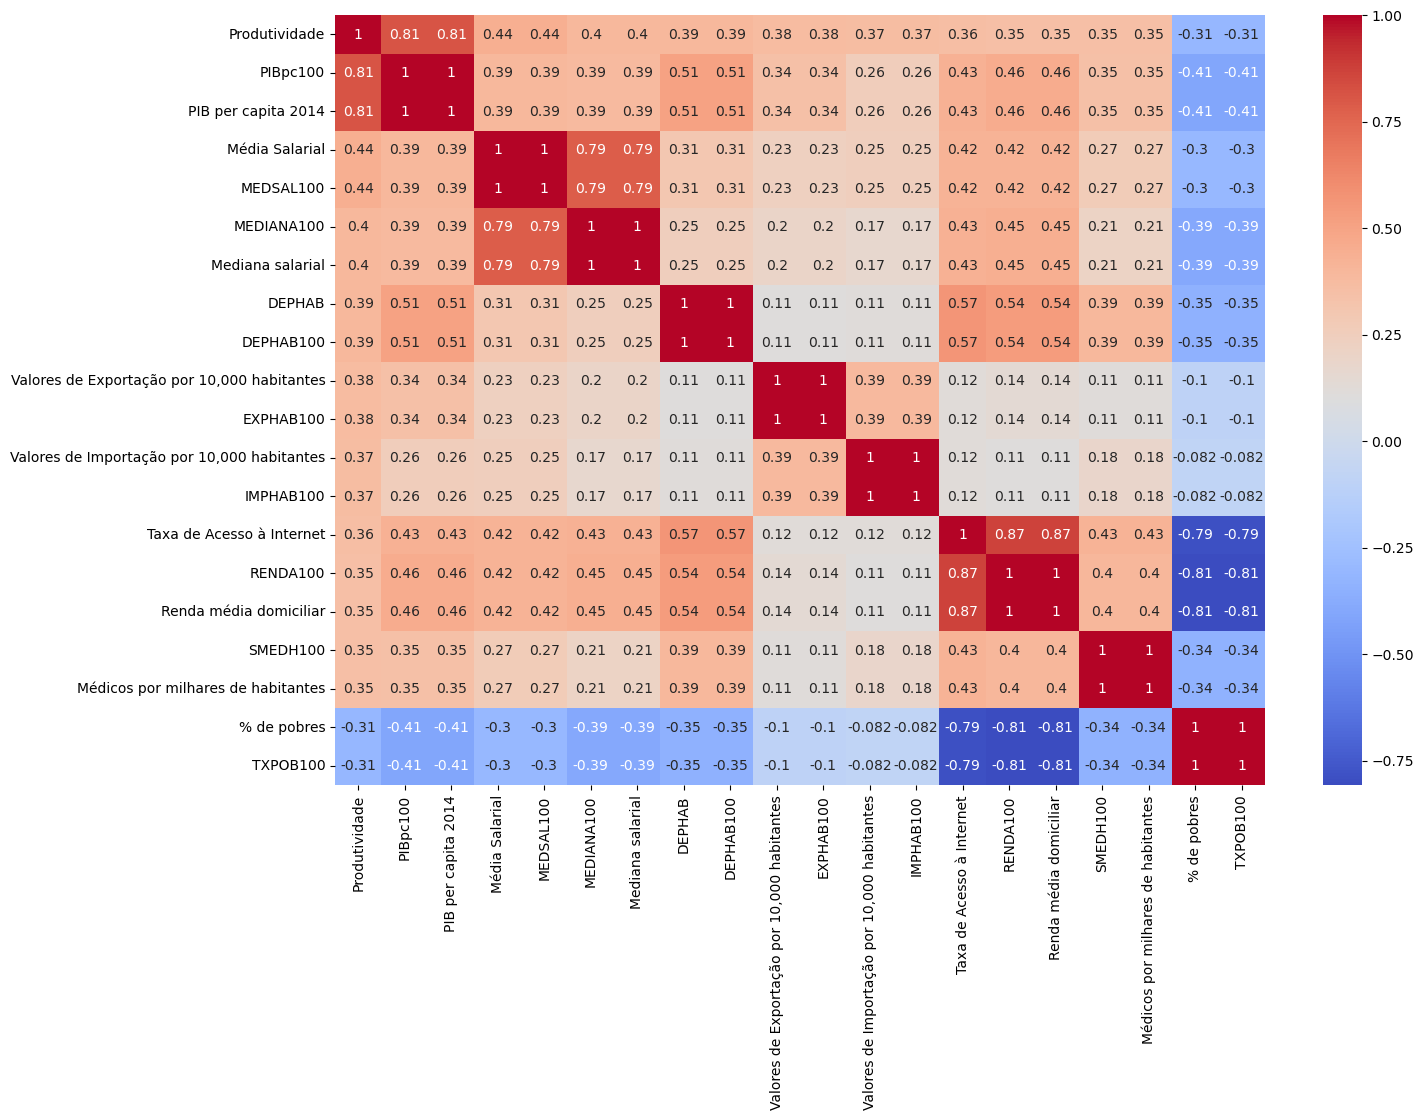

In [41]:
# Lista de colunas de interesse
cols_of_interest = correlation_prod_sorted_abs.index[:21].tolist()
cols_of_interest.remove('PRODUT100') # Removendo a correlação perfeita

# Subconjunto do DataFrame com as colunas de interesse
df_interest = df[cols_of_interest]

# Correlação
correlation = df_interest.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


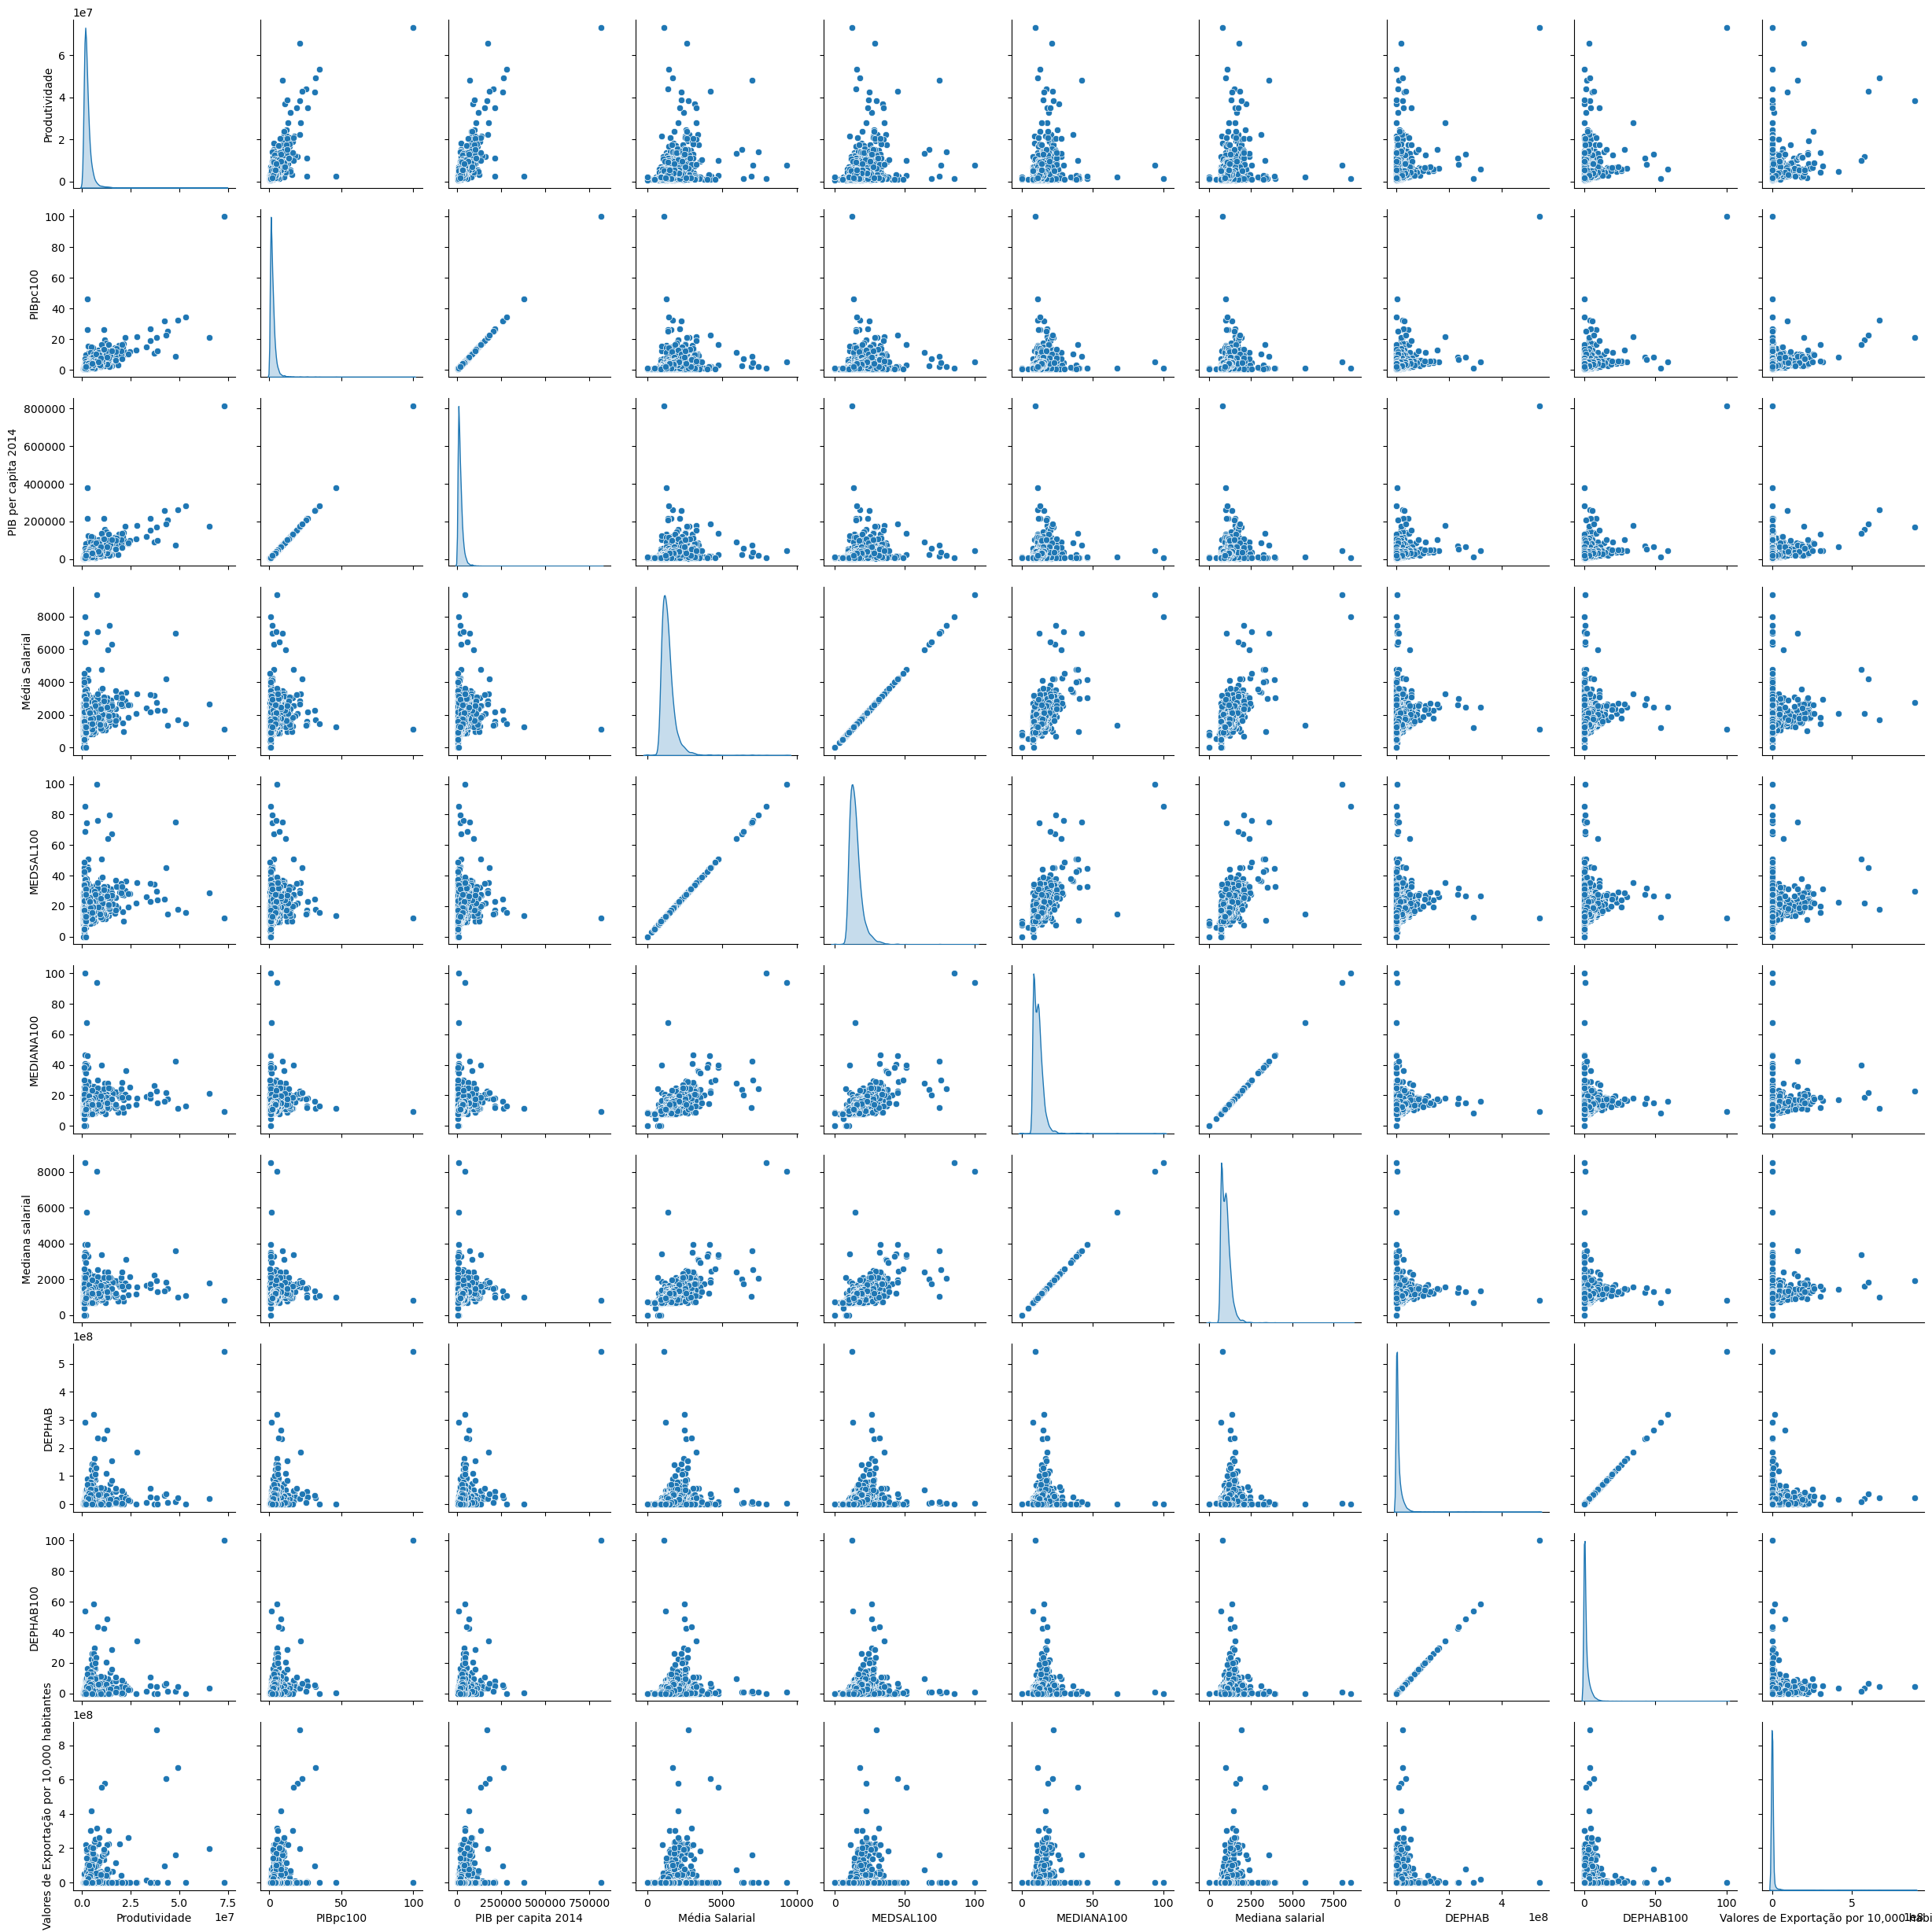

In [42]:
# Lista de colunas de interesse
cols_of_interest = correlation_prod_sorted.index[:11].tolist()
cols_of_interest.remove('PRODUT100') # Removendo a correlação perfeita

# Subconjunto do DataFrame com as colunas de interesse
df_interest = df[cols_of_interest]

# Adicionando a coluna 'Produtividade' ao DataFrame
df_interest['Produtividade'] = df['Produtividade']

# Plot do pairplot
sns.pairplot(df_interest, diag_kind='kde')
plt.show()

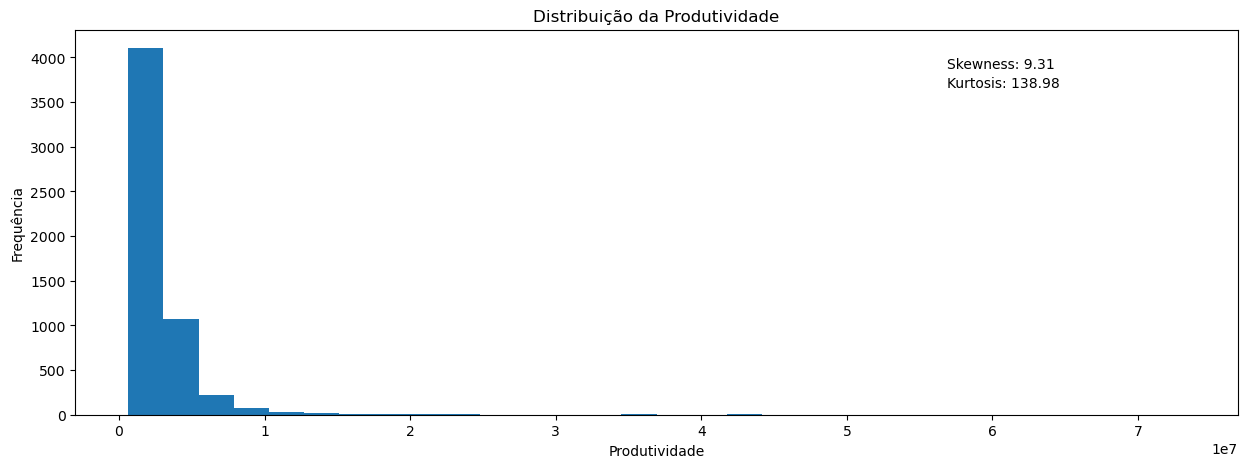

In [43]:
# Calcular a assimetria e a curtose
skewness = df['Produtividade'].skew()
kurtosis = df['Produtividade'].kurtosis()

# Plotar o histograma
plt.figure(figsize = (15,5))
plt.hist(df['Produtividade'], bins=30)
plt.xlabel('Produtividade')
plt.ylabel('Frequência')
plt.title('Distribuição da Produtividade')

# Adicionar informações sobre a assimetria e a curtose no gráfico
plt.text(0.75, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.text(0.75, 0.85, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes)

plt.show()

Com uma assimetria (skewness) de 9,31 e uma curtose (kurtosis) de 138,98, a distribuição da coluna 'Produtividade' parece ser altamente assimétrica e com uma cauda longa.

Esses valores indicam que há uma grande assimetria positiva na distribuição, ou seja, a distribuição tem uma cauda alongada para a direita e valores extremamente altos que estão puxando a média para cima.

Nesse caso, aplicar uma transformação logarítmica na coluna 'Produtividade' pode ajudar a reduzir a assimetria e tornar a distribuição mais simétrica. A transformação logarítmica tende a reduzir a amplitude dos valores extremamente altos, enquanto mantém uma melhor representação dos valores menores.

In [44]:
# Aplicar a transformação logarítmica
df['Produtividade_log'] = np.log1p(df['Produtividade'])

In [52]:
# Lista das 20 primeiras variáveis correlacionadas, excluindo a variável de correlação perfeita
variaveis_correlacionadas = correlation_prod_sorted.index[2:22]

# Calcular a assimetria e a curtose para cada variável
skewness = []
kurtosis = []

for variavel in variaveis_correlacionadas:
    skewness.append(stats.skew(df[variavel]))
    kurtosis.append(stats.kurtosis(df[variavel]))

# Criar um DataFrame com os resultados
resultados = pd.DataFrame({'Variável': variaveis_correlacionadas,
                           'Skewness': skewness,
                           'Kurtosis': kurtosis})

# Imprimir os resultados
print(resultados)

                                             Variável   Skewness    Kurtosis
0                                            PIBpc100  13.263760  393.391090
1                                 PIB per capita 2014  13.263760  393.391090
2                                      Média Salarial   4.156970   40.200808
3                                           MEDSAL100   4.156970   40.200808
4                                          MEDIANA100   6.168815  105.351002
5                                    Mediana salarial   6.168815  105.351002
6                                              DEPHAB  11.854338  276.561068
7                                           DEPHAB100  11.854338  276.561068
8         Valores de Exportação por 10,000 habitantes  14.879823  314.843176
9                                           EXPHAB100  14.879823  314.843176
10        Valores de Importação por 10,000 habitantes  19.989547  566.198594
11                                          IMPHAB100  19.989547  566.198594

PIBpc100: A variável "PIB per capita 2014" apresenta uma alta assimetria (13.26) e uma curtose elevada (393.39). Nesse caso, uma transformação logarítmica pode ser adequada para reduzir a assimetria e aproximar a distribuição da normalidade.

Média Salarial e MEDSAL100: Ambas as variáveis apresentam uma assimetria considerável (4.16) e uma curtose moderada (40.20). Uma transformação logarítmica também pode ser útil para obter uma distribuição mais simétrica.

Valores de Exportação e Valores de Importação: Tanto as variáveis "Valores de Exportação por 10,000 habitantes" quanto "Valores de Importação por 10,000 habitantes" exibem uma alta assimetria (14.88 e 19.99, respectivamente) e uma curtose elevada (314.84 e 566.20, respectivamente). Nesse caso, uma transformação logarítmica pode ajudar a reduzir a assimetria e tornar a distribuição mais simétrica.

Taxa de Acesso à Internet: Essa variável possui uma assimetria próxima de zero (0.92) e uma curtose baixa (0.34). Não é necessário aplicar uma transformação nesse caso, pois a distribuição já é relativamente simétrica.

Renda100 e Renda média domiciliar: Ambas as variáveis exibem uma assimetria moderada (1.10) e uma curtose baixa (2.13). Uma transformação logarítmica pode ajudar a melhorar a simetria e a distribuição das variáveis.

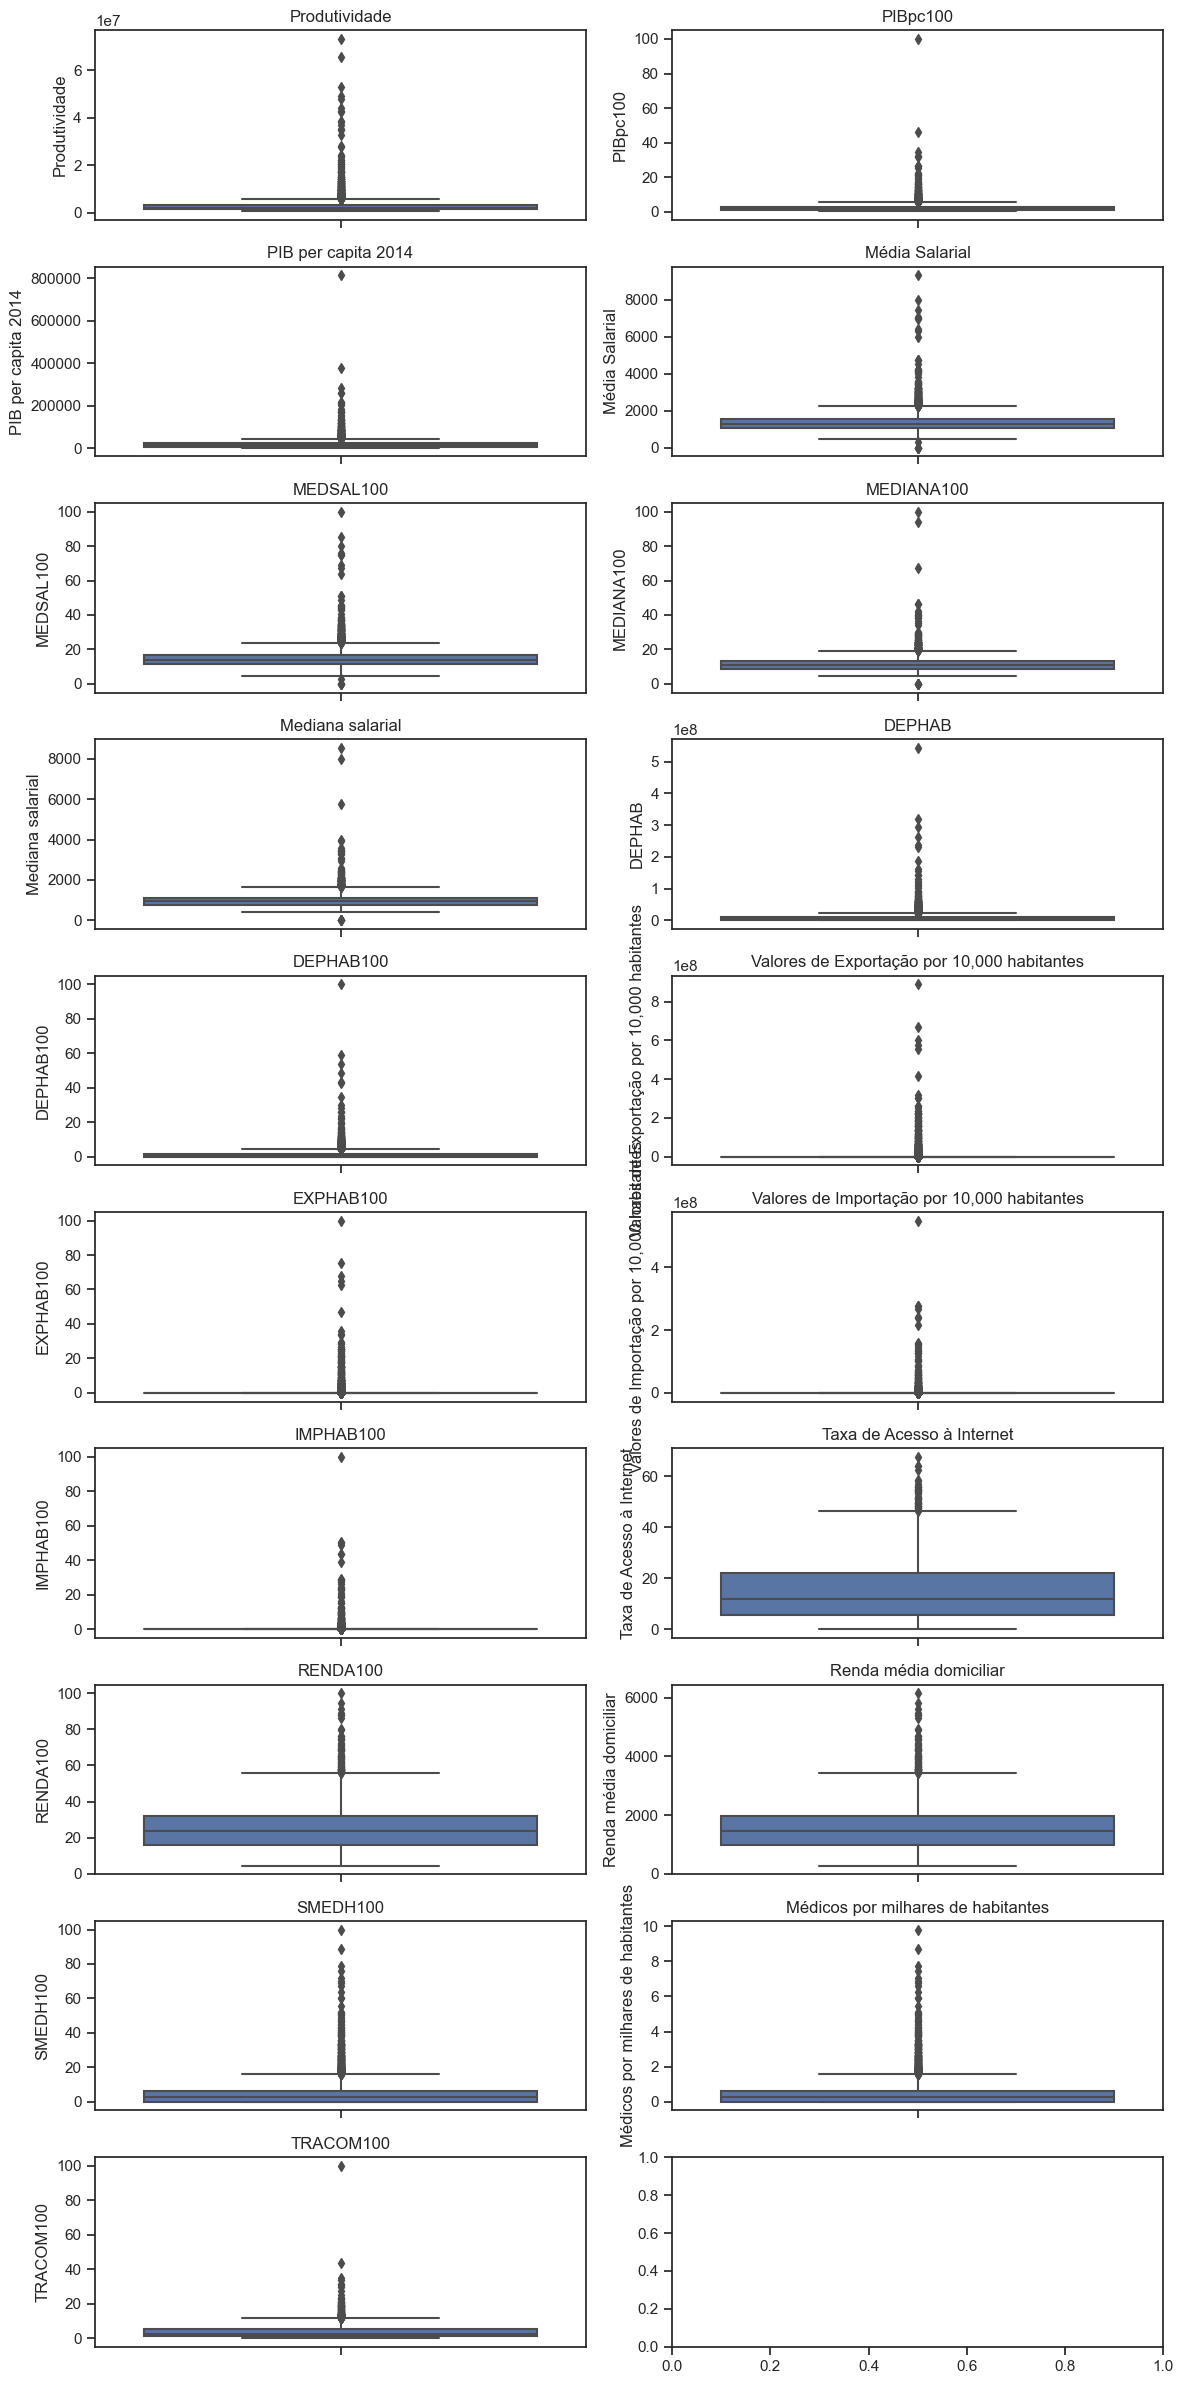

In [62]:
# Lista das colunas de interesse
colunas_interesse = ['Produtividade', 'PIBpc100', 'PIB per capita 2014', 'Média Salarial', 'MEDSAL100', 'MEDIANA100',
                     'Mediana salarial', 'DEPHAB', 'DEPHAB100', 'Valores de Exportação por 10,000 habitantes',
                     'EXPHAB100', 'Valores de Importação por 10,000 habitantes', 'IMPHAB100', 'Taxa de Acesso à Internet',
                     'RENDA100', 'Renda média domiciliar', 'SMEDH100', 'Médicos por milhares de habitantes', 'TRACOM100']

# Configuração dos subplots
fig, axs = plt.subplots(len(colunas_interesse)//2 + 1, 2, figsize=(12, 24))

# Geração dos boxplots
for i, coluna in enumerate(colunas_interesse):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df, y=coluna, ax=axs[row, col])
    axs[row, col].set_title(coluna)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibição dos subplots
plt.show()

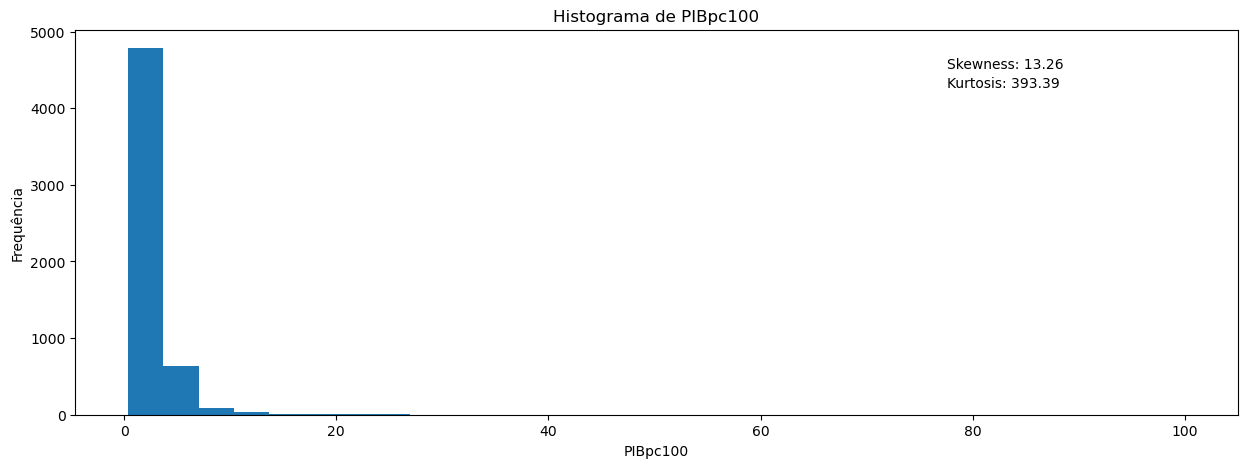

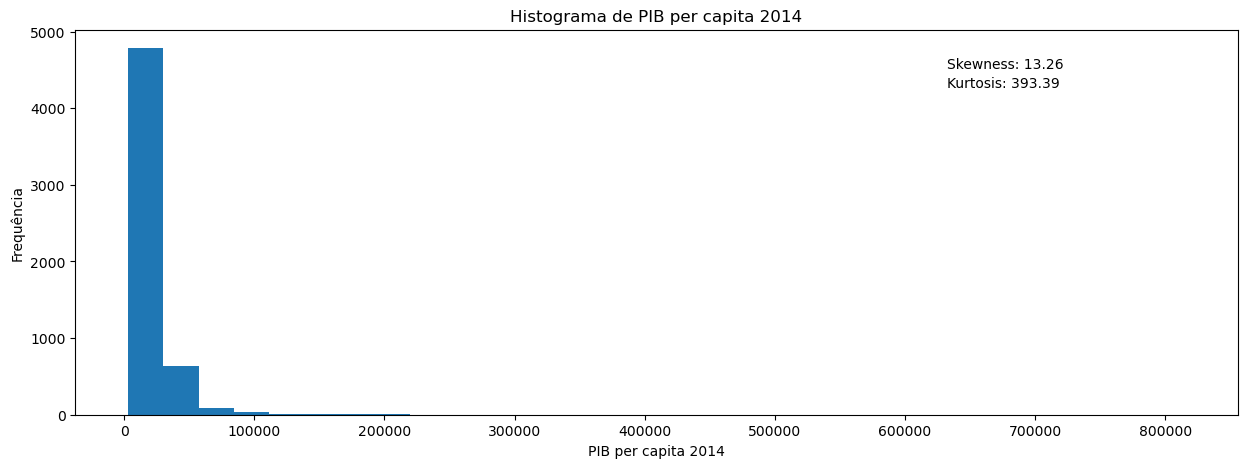

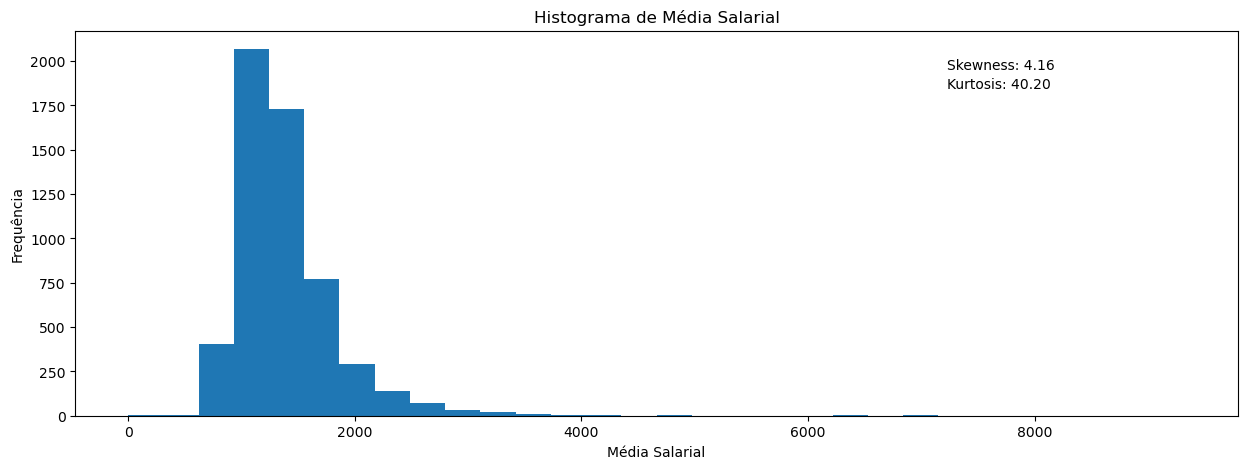

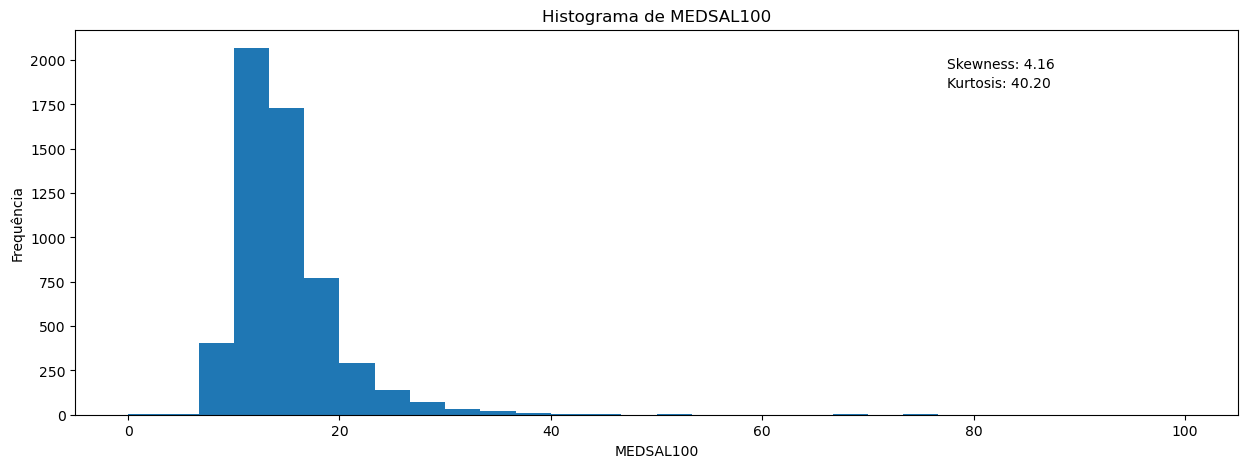

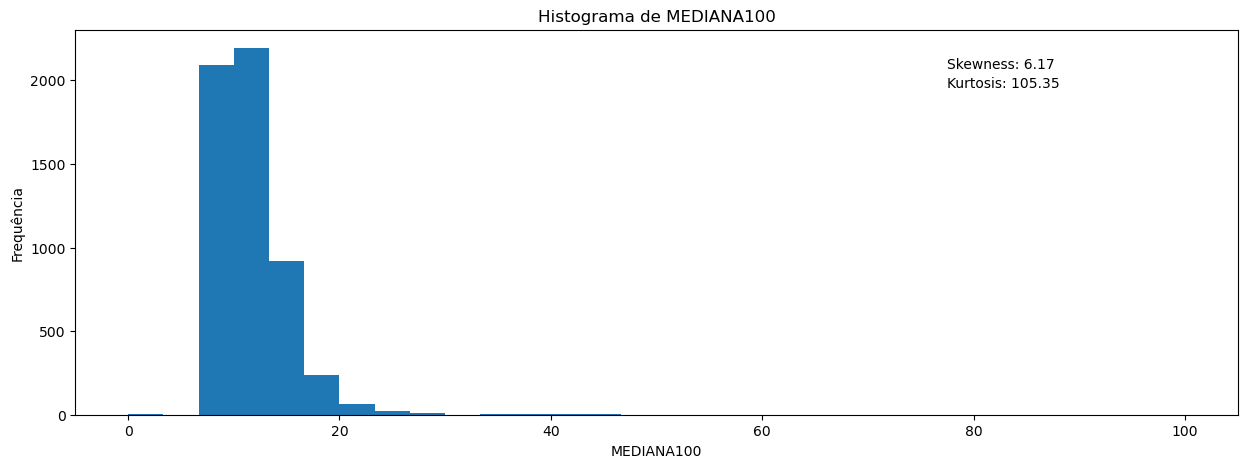

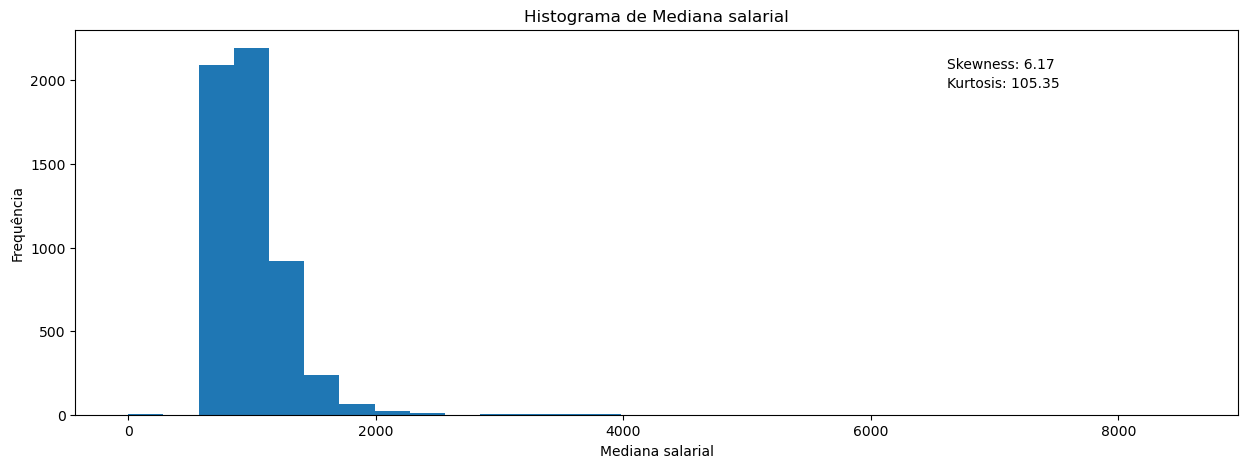

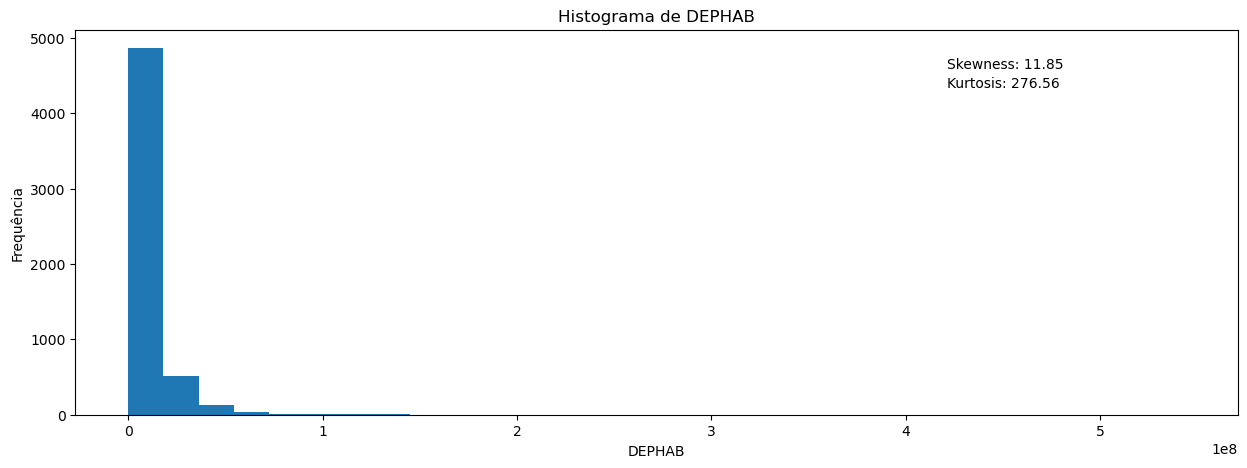

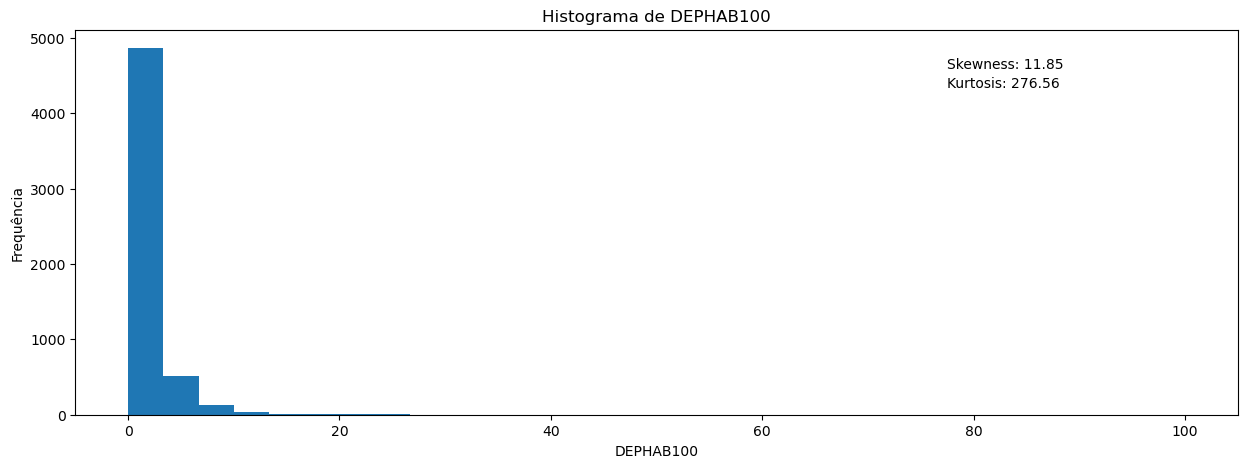

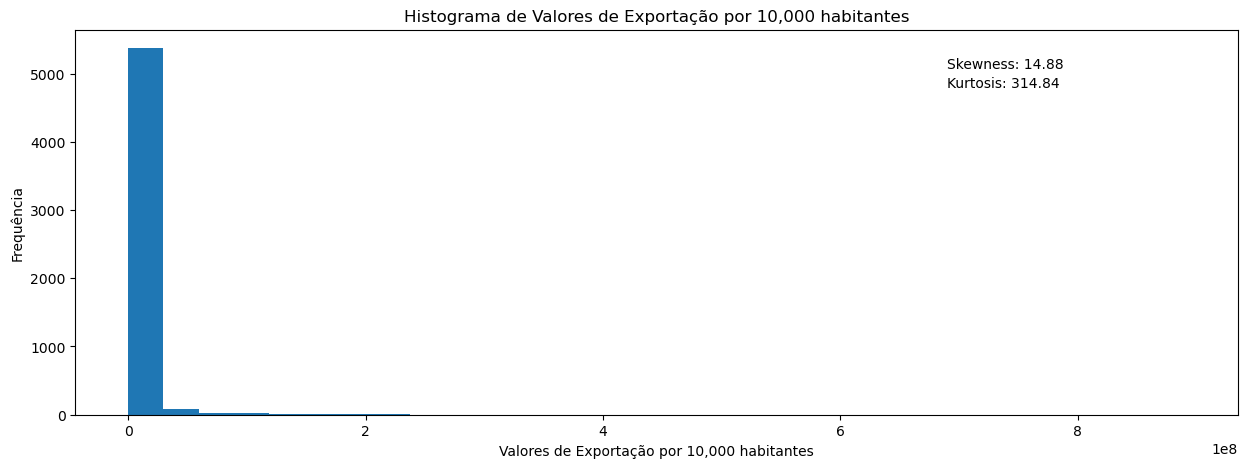

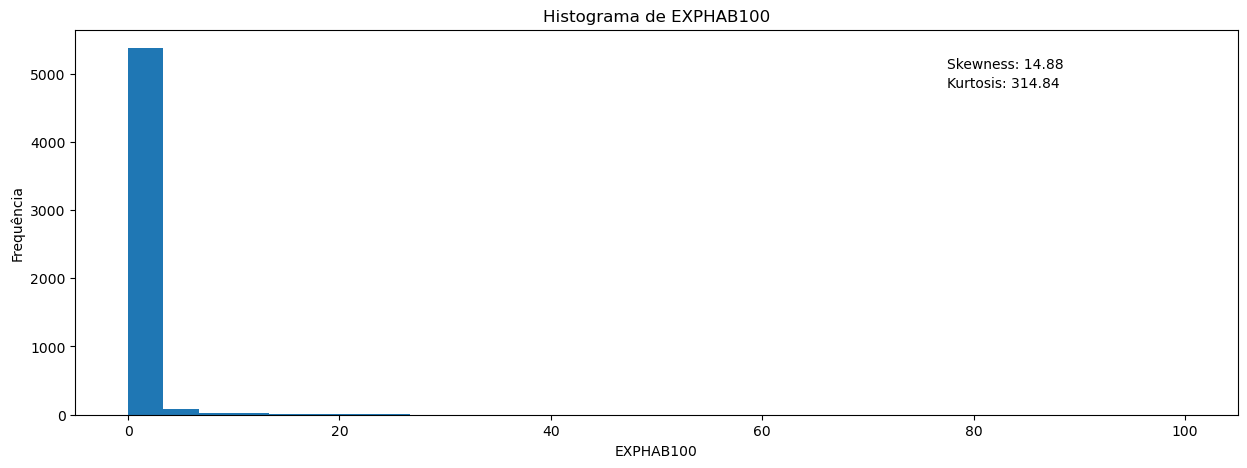

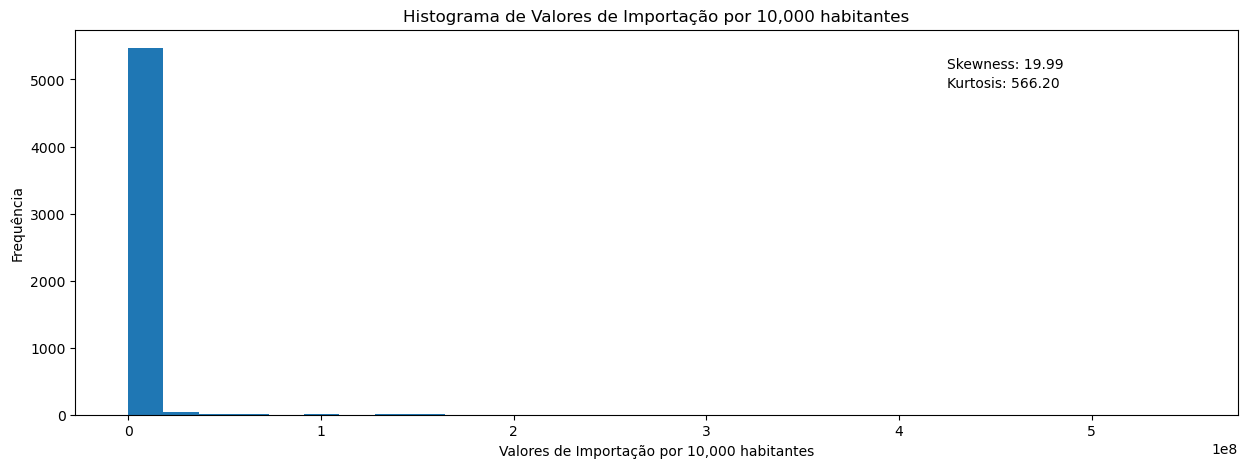

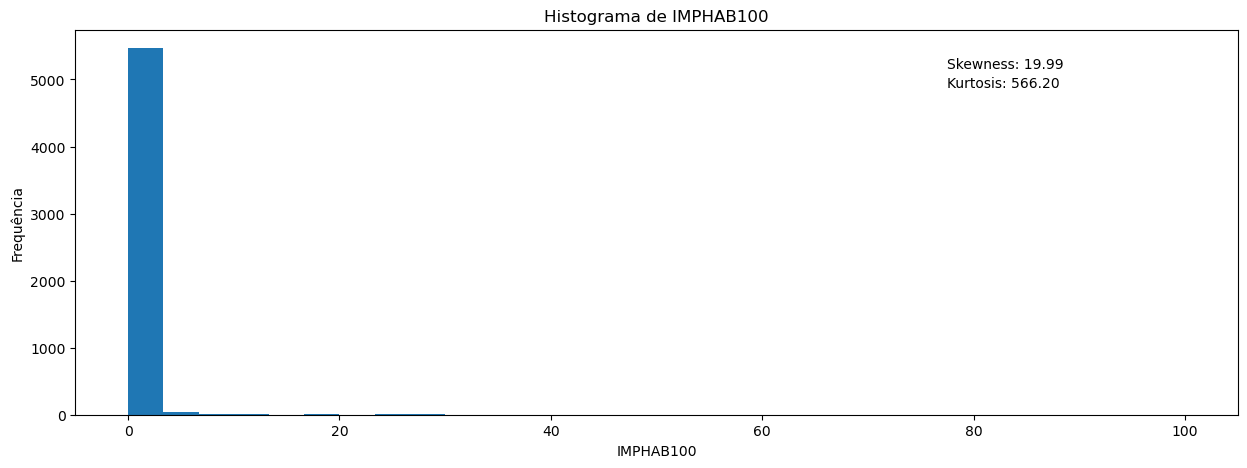

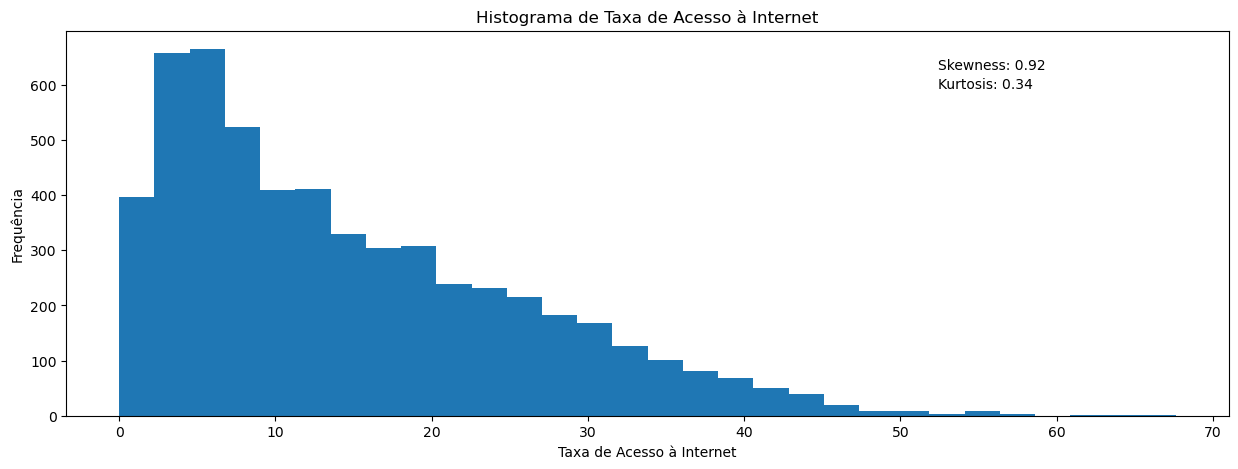

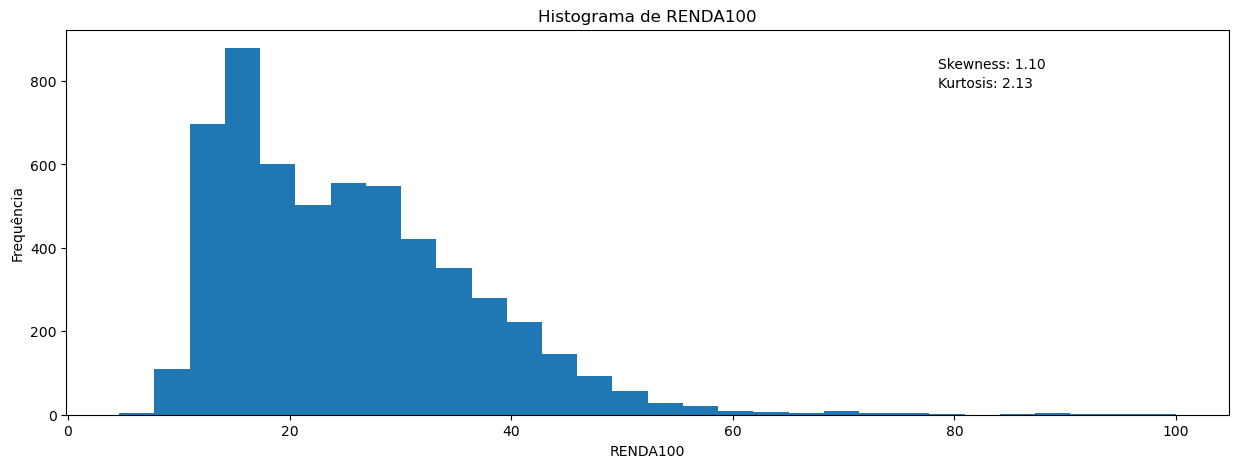

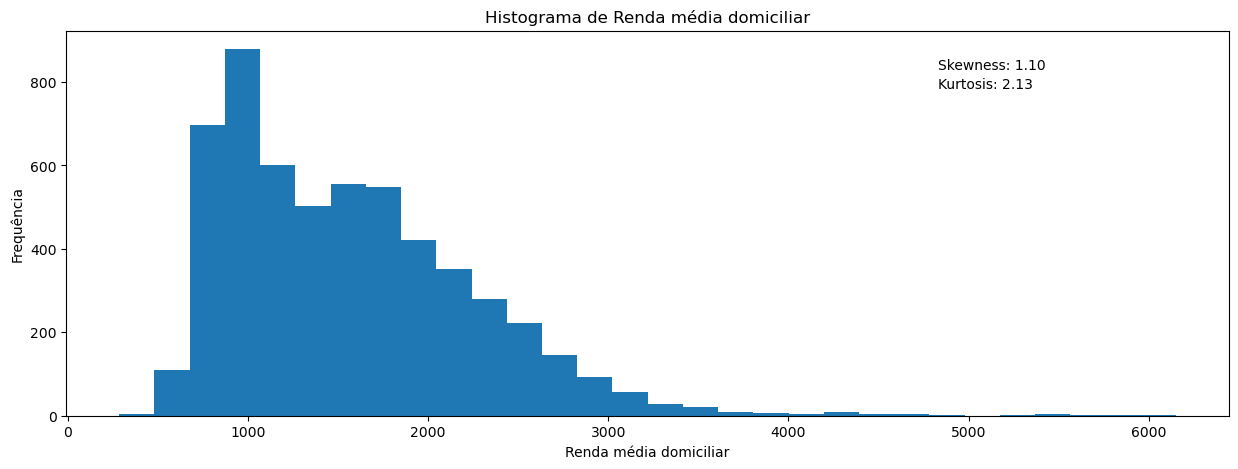

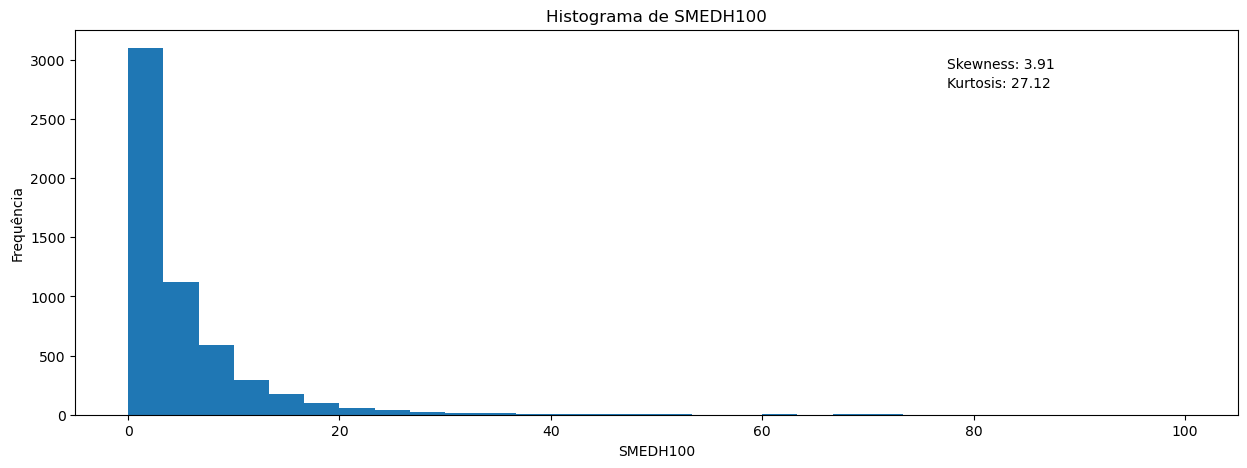

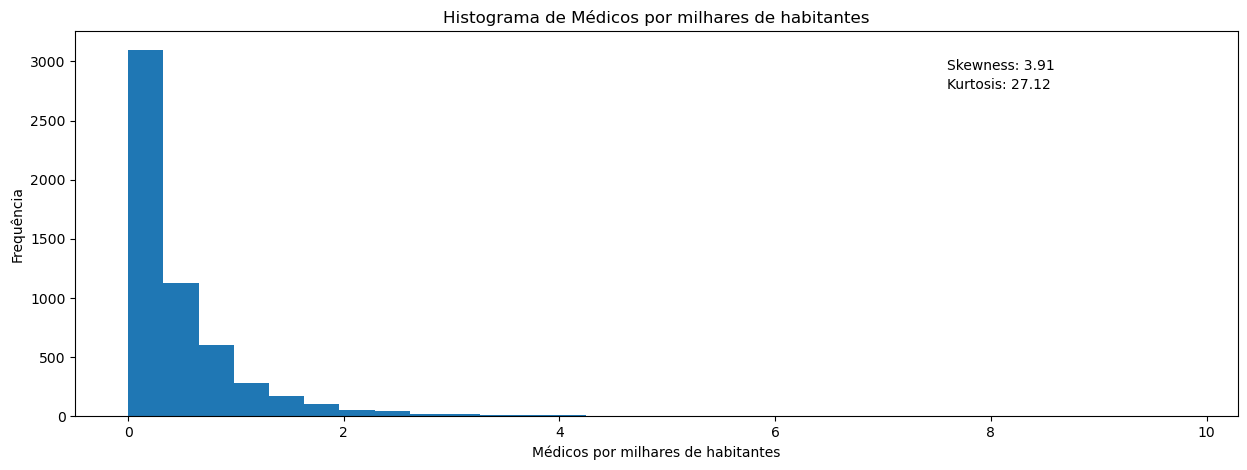

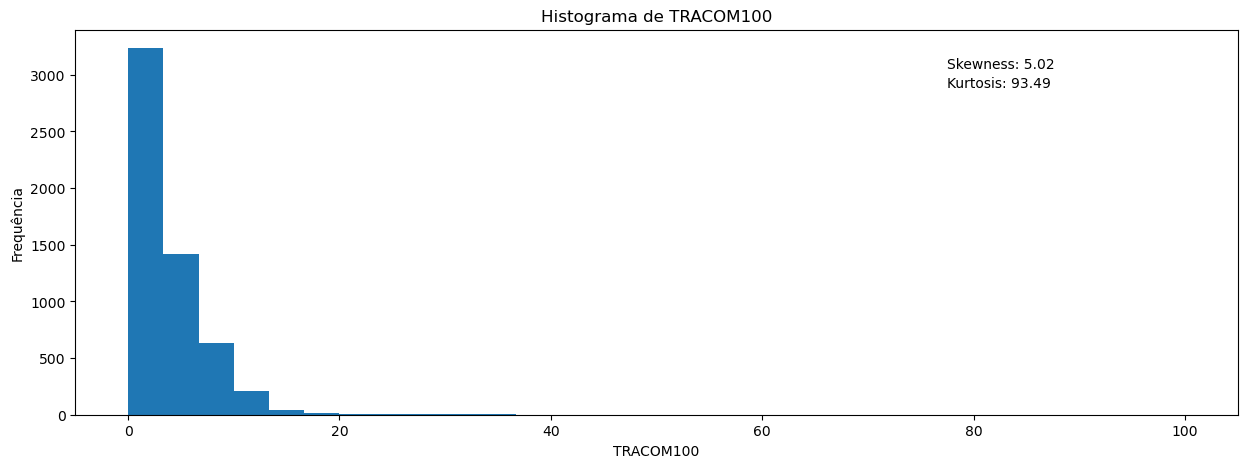

In [55]:
# Lista das colunas de interesse
colunas_interesse = ['PIBpc100', 'PIB per capita 2014', 'Média Salarial', 'MEDSAL100', 'MEDIANA100', 'Mediana salarial',
                     'DEPHAB', 'DEPHAB100', 'Valores de Exportação por 10,000 habitantes', 'EXPHAB100',
                     'Valores de Importação por 10,000 habitantes', 'IMPHAB100', 'Taxa de Acesso à Internet',
                     'RENDA100', 'Renda média domiciliar', 'SMEDH100', 'Médicos por milhares de habitantes', 'TRACOM100']

# Plotar histograma para cada coluna
for coluna in colunas_interesse:
    plt.figure(figsize=(15, 5))
    plt.hist(df[coluna], bins=30)
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.title(f'Histograma de {coluna}')
    
    # Calcular a assimetria e a curtose
    skewness = stats.skew(df[coluna])
    kurtosis = stats.kurtosis(df[coluna])
    
    # Adicionar informações sobre a assimetria e a curtose no gráfico
    plt.text(0.75, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
    plt.text(0.75, 0.85, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes)
    
    plt.show()


In [ ]:
# Lista de variáveis para aplicar a transformação logarítmica
variaveis_log = ['PRODUT100', 'PIBpc100', 'PIB per capita 2014', 'MEDIANA100', 'Mediana salarial',
                 'DEPHAB', 'DEPHAB100', 'Valores de Exportação por 10,000 habitantes', 'EXPHAB100',
                 'Valores de Importação por 10,000 habitantes', 'IMPHAB100']

# Aplicar a transformação logarítmica em cada variável
for variavel in variaveis_log:
    df[variavel + '_log'] = np.log(df[variavel])